In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the file 
df=pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
#finding the columns
df.keys()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [4]:
#finding the datatypes of the data set.
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
#finding the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
#finding the shape of the dataset like rows and columns
df.shape

(4177, 9)

In [7]:
#finding the nullvalue with sum
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
df = pd.DataFrame(data=df)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
# adding Age column
#Rings / integer / -- / +1.5 gives the age in years
df['Age'] = (df['Rings']+1.5)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [10]:
# sex column we have 3 attributes 1:M,0:F,2:I or infant
#by using encoder we can change the values to int
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
for col in df.columns:
    if(len(df[col].value_counts()) ==3):#Unique values
        change = preprocessing.LabelEncoder()
        df[col] = change.fit_transform(df[col])

In [11]:
#finding the matrics of the dataset

df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [12]:
#finding the correlation and diagonal value are same
dfcor=df.corr()
dfcor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
Age,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


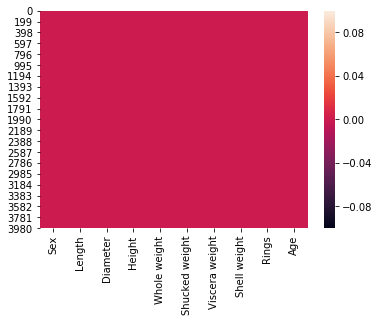

In [13]:
#finding the null values in heatmap

sns.heatmap(df.isnull())

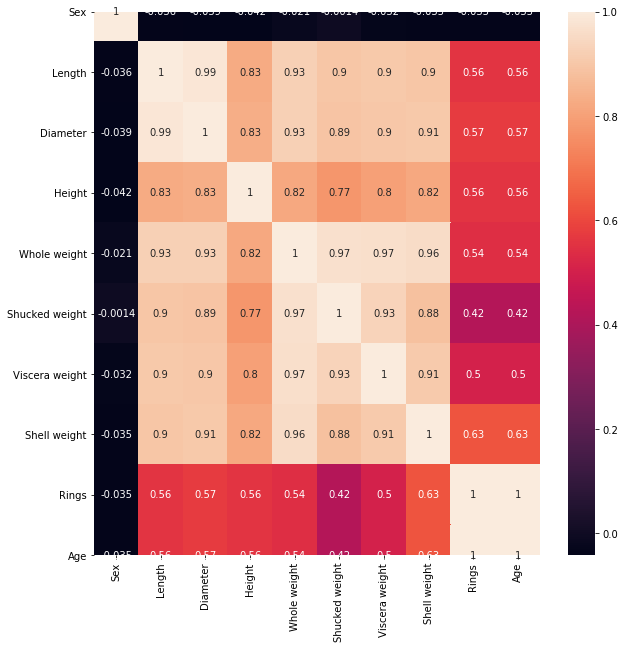

In [14]:
#ploting the values in heatmap
plt.figure(figsize=(10,10))
sns.heatmap(dfcor, color="gold",annot=True)

In [15]:
#2: male, 0: female  1: infant
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [16]:
#checking the skewness of dataset
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

In [17]:
#to remove the skewness of dataset

for i in df.columns:
#Here complete column name has been passed
    if df.skew().loc[i]>0.55: #-0.55
     if df.skew().loc[i]<-0.55:
            df[i]=np.log1p(df[i])
            df[i]=np.square(df[i])
        
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

In [18]:
#removing outlires
from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (4177, 10)
df1.shape: (4027, 10)
z value is: [[1.15198011 0.57455813 0.43214879 ... 0.63821689 1.57154357 1.57154357]
 [1.15198011 1.44898585 1.439929   ... 1.21298732 0.91001299 0.91001299]
 [1.28068972 0.05003309 0.12213032 ... 0.20713907 0.28962385 0.28962385]
 ...
 [1.15198011 0.6329849  0.67640943 ... 0.49695471 0.28962385 0.28962385]
 [1.28068972 0.84118198 0.77718745 ... 0.41073914 0.02057072 0.02057072]
 [1.15198011 1.54905203 1.48263359 ... 1.84048058 0.64095986 0.64095986]]


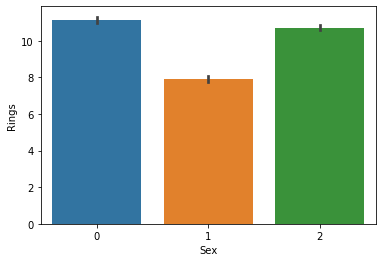

In [19]:
# lets find out the bar graph for Rings and Sex
#2: male, 0: female  1: infant
sns.barplot(x="Sex",y="Rings",data=df)
plt.show()

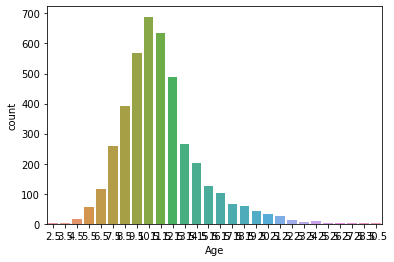

In [20]:
#checking count of diffrent sex
sns.countplot(x=df['Age'],data=df)

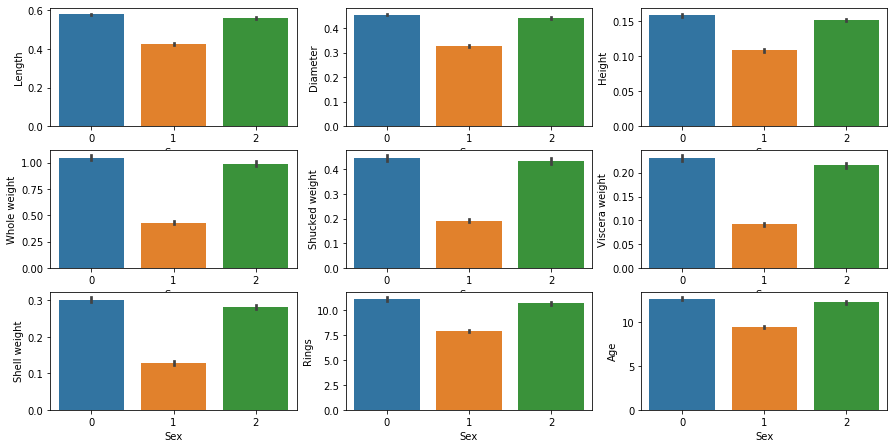

In [21]:
# creating bar plot of every colum with respect to sex to check how other parametr are distributed among thegender
figure(num=None, figsize=(15,10))
for column_index, column in enumerate(df.columns):
    if column == 'Sex':
        continue
    plt.subplot(4, 3, column_index)
    sns.barplot(x='Sex', y=column, data=df)

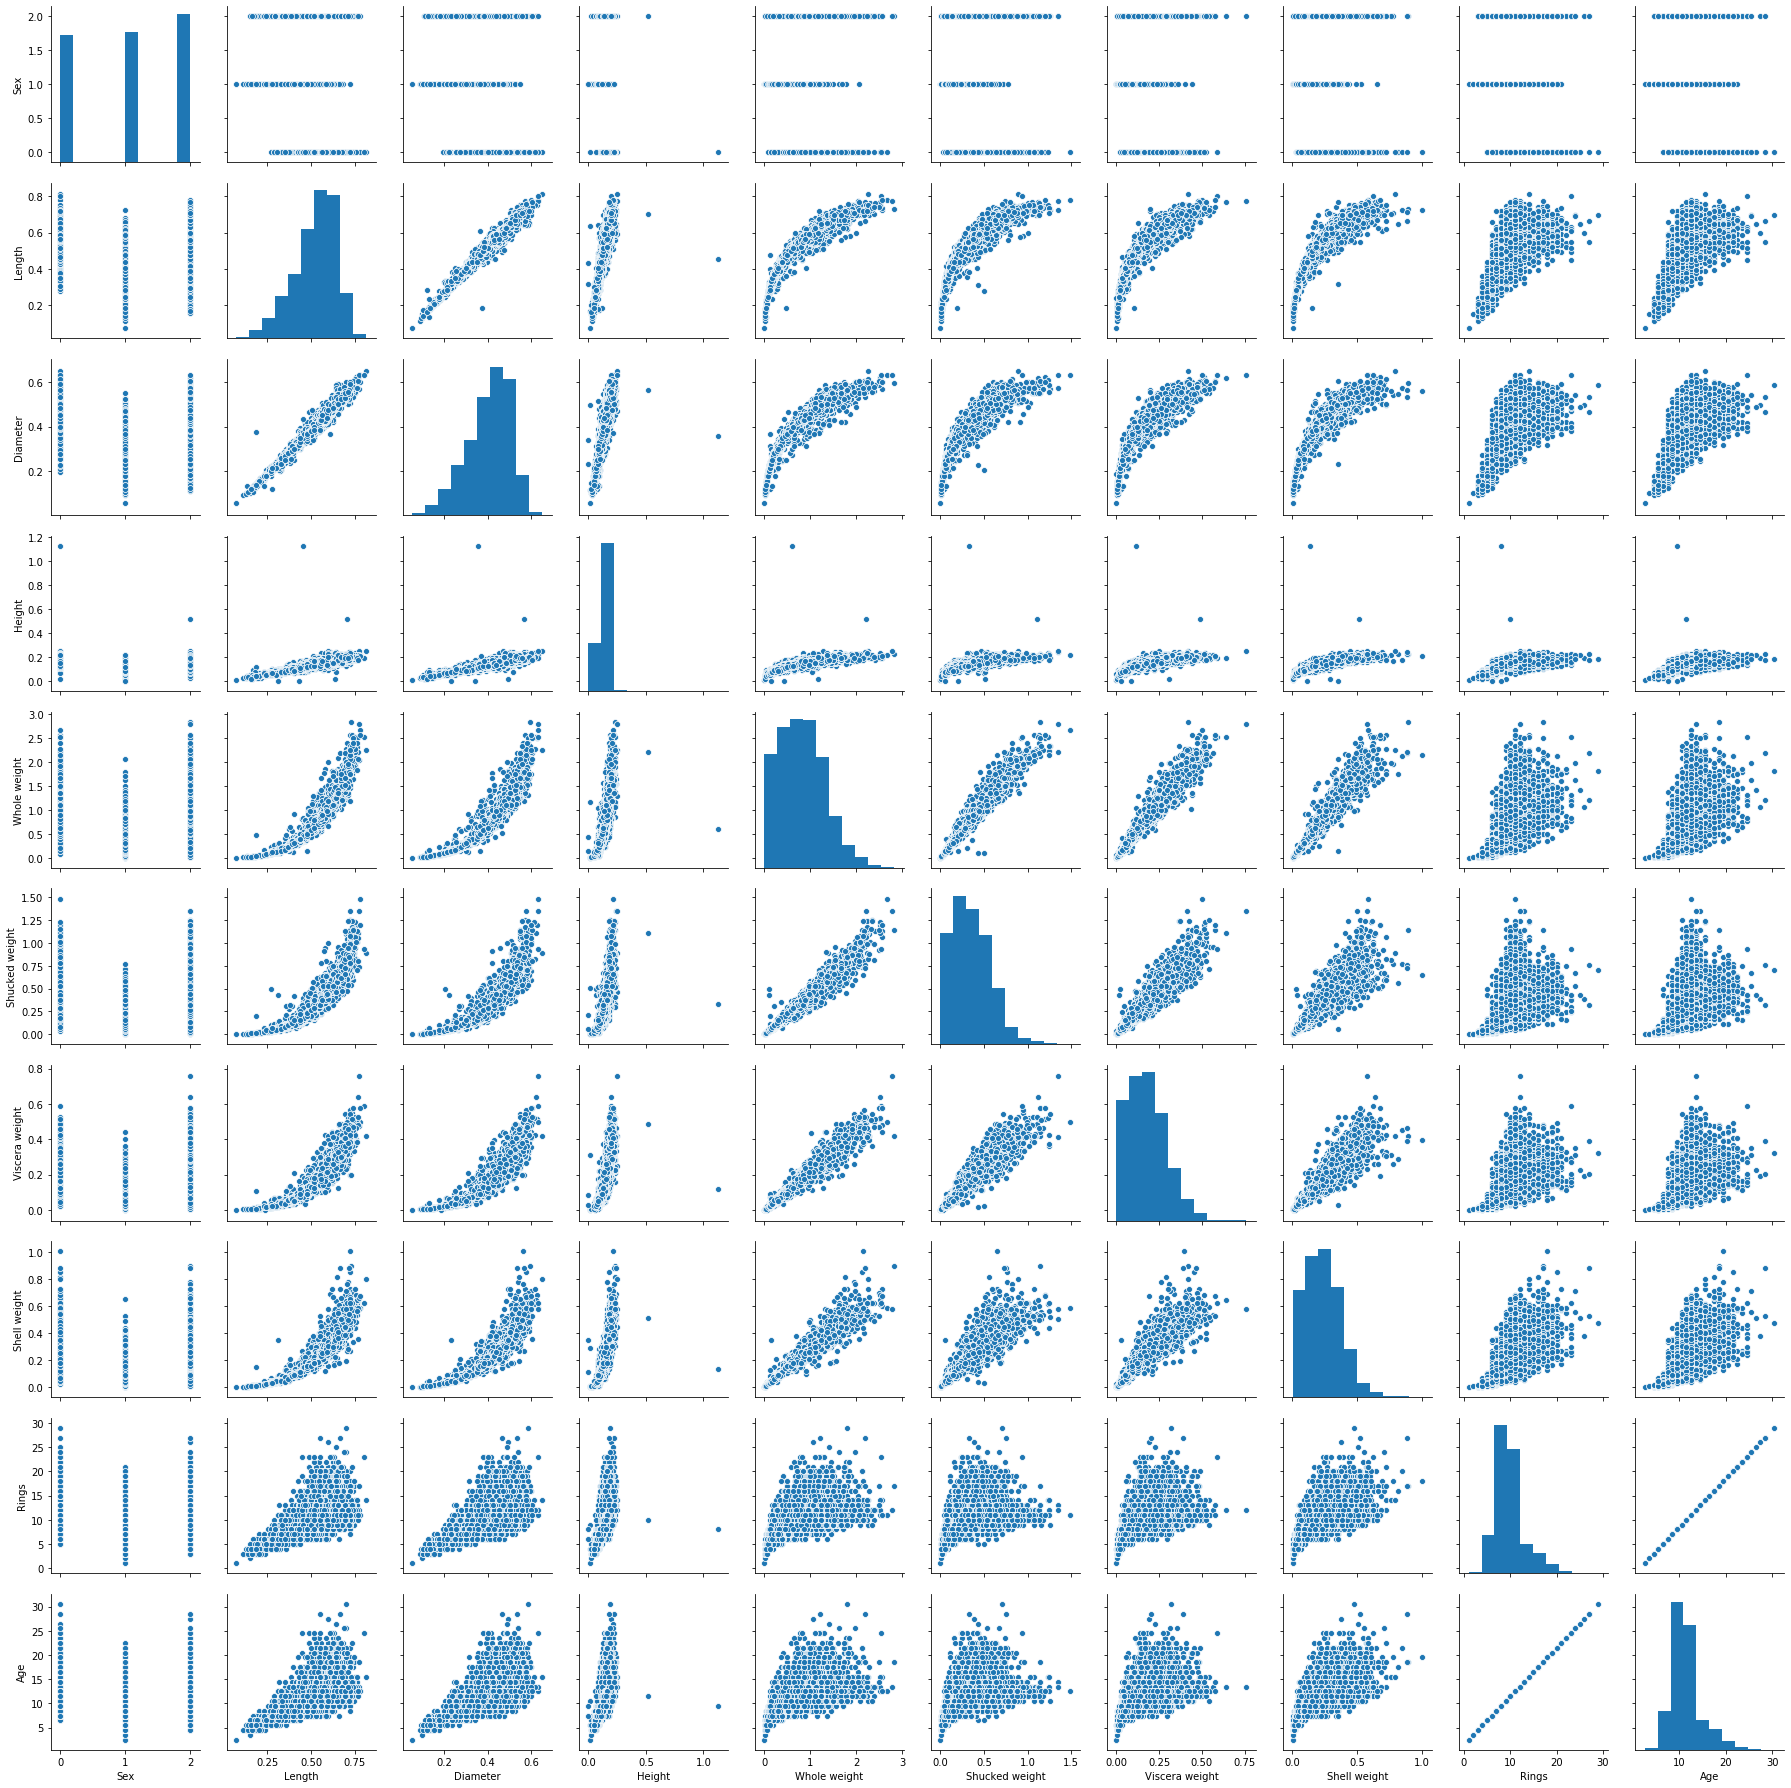

In [22]:
#pairplot using seaborn lib

sns.pairplot(df)
plt.show()

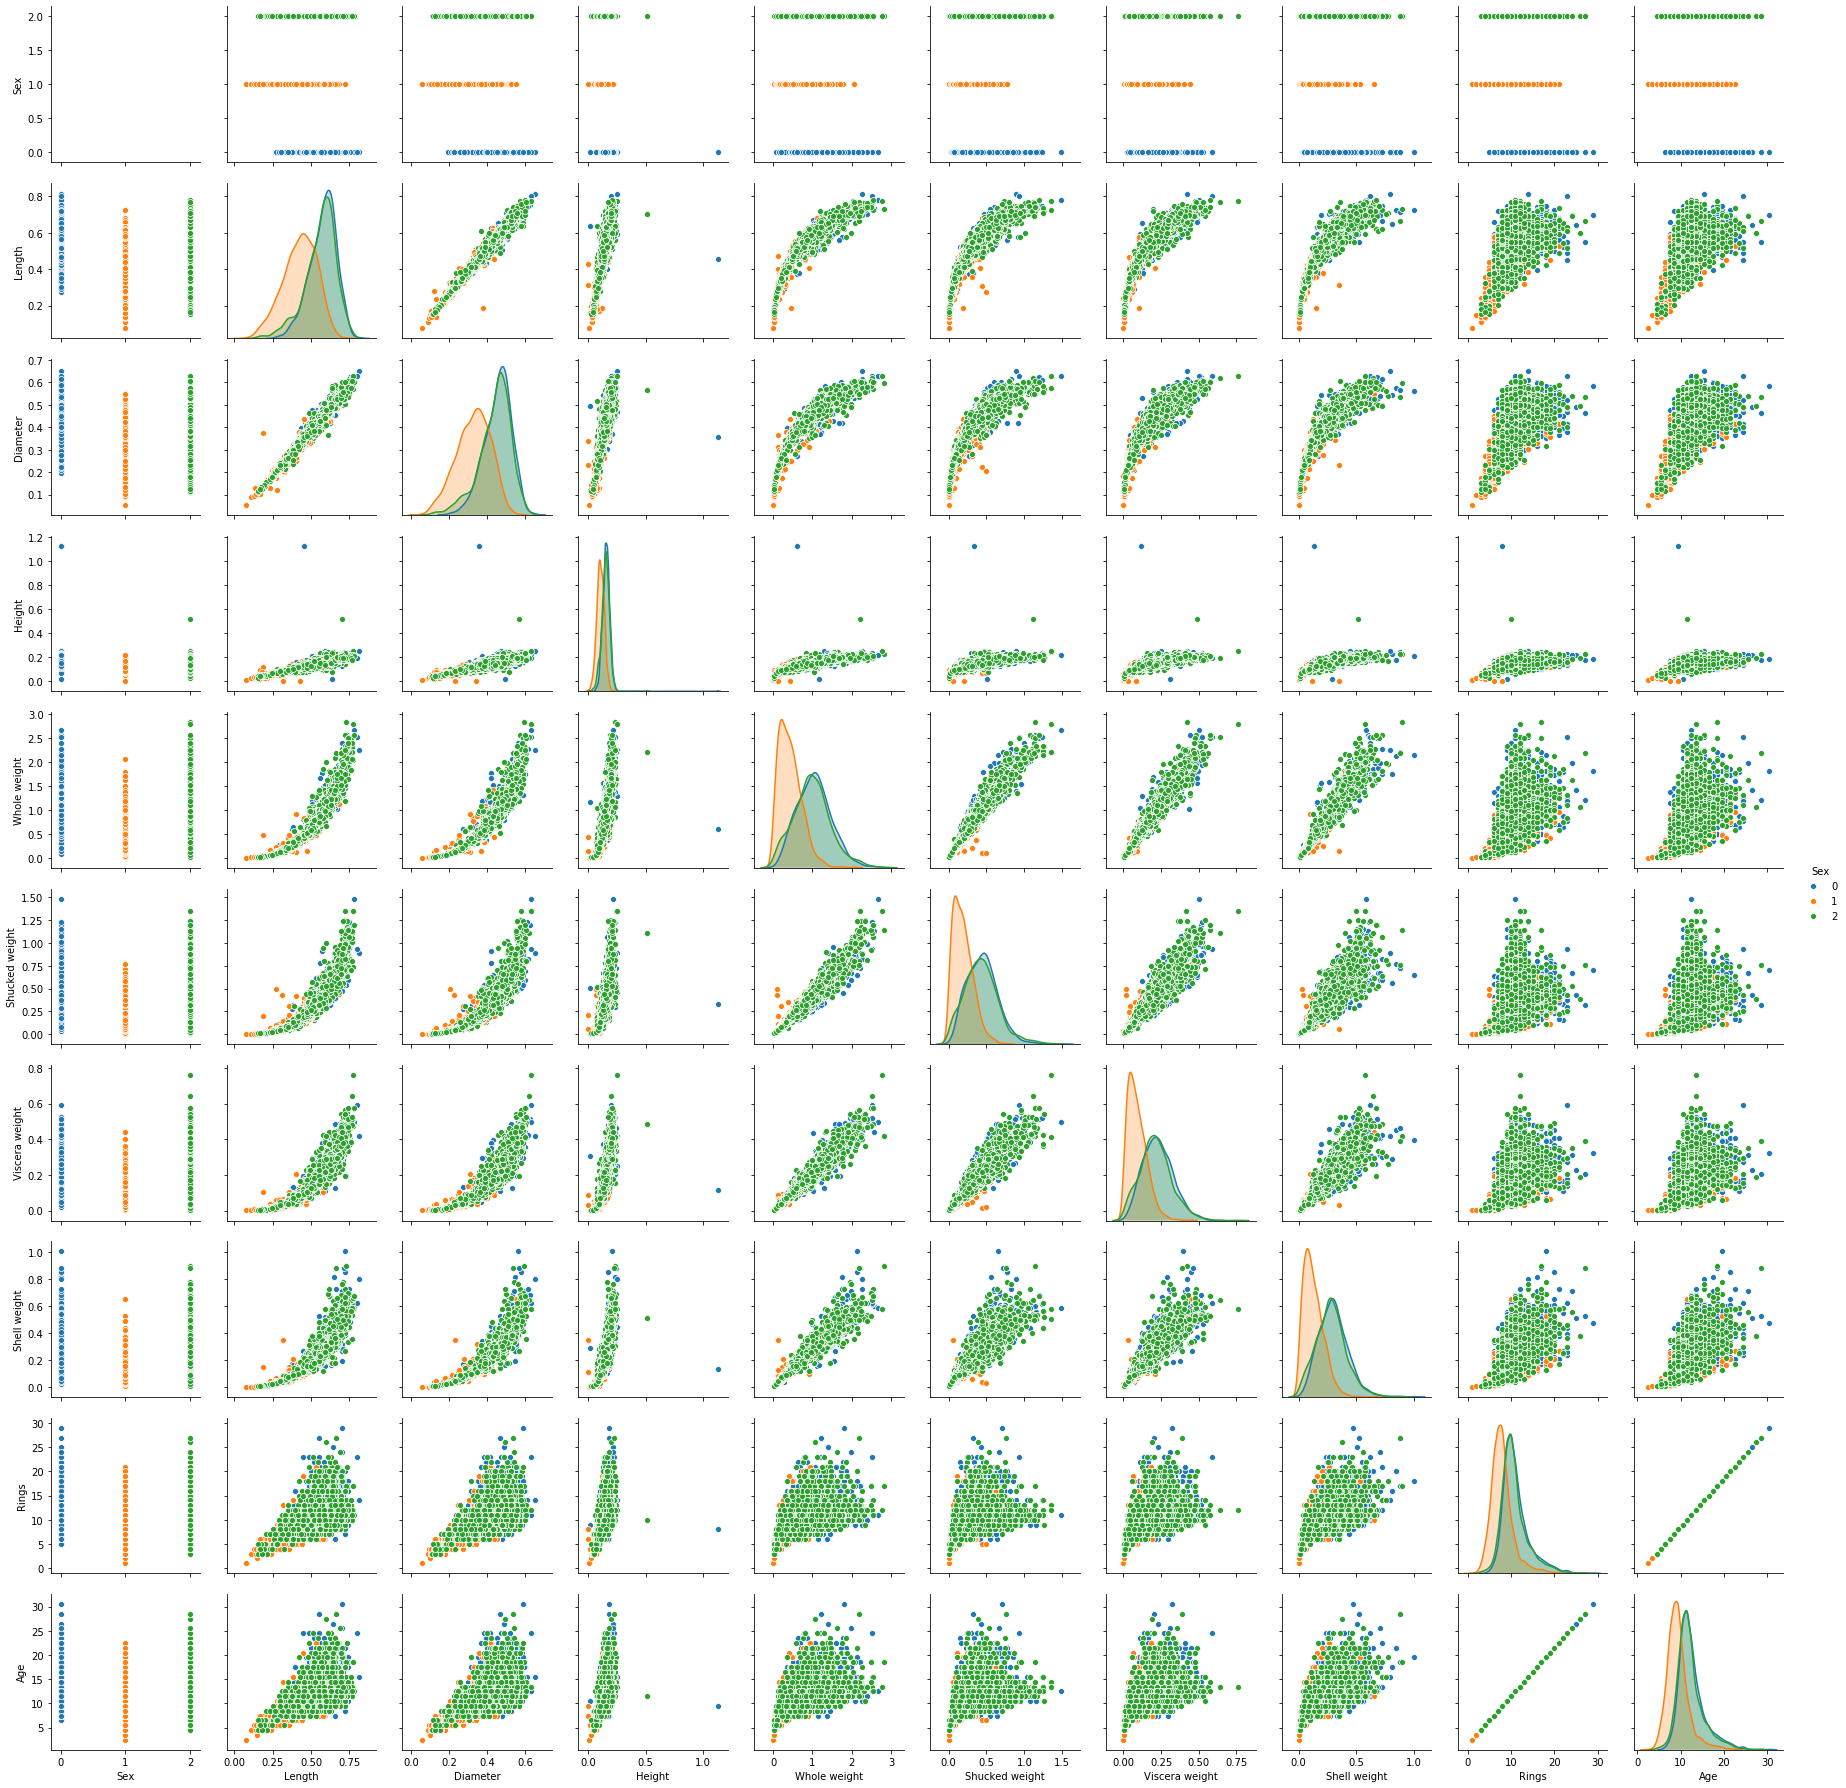

In [23]:
# pair plot to see the scatter of data using sex as hue for clear understanding
sns.pairplot(df, hue='Sex')

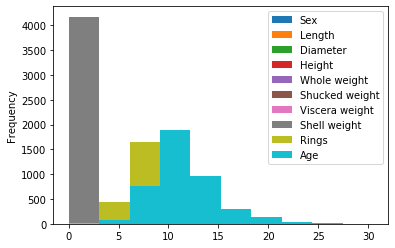

In [24]:
#hist representation of data
df.plot.hist()

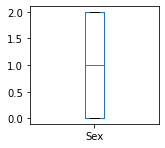

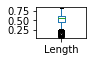

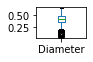

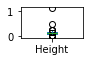

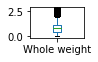

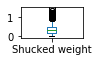

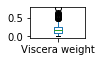

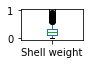

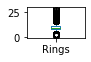

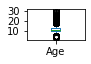

In [25]:
#box plot through iterations
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

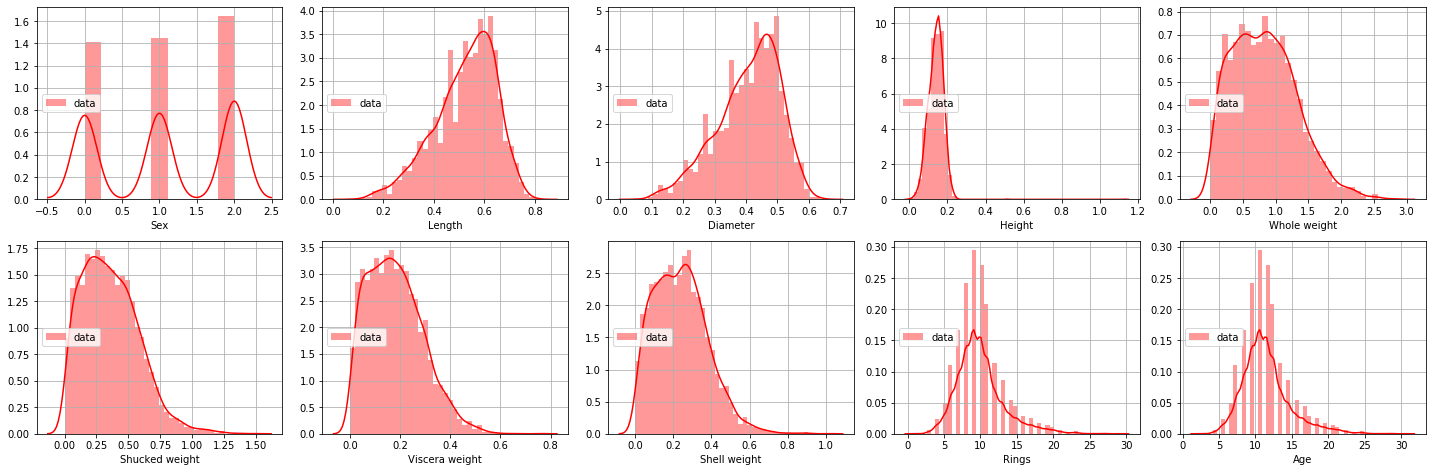

In [26]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='center left')
    plt.tight_layout()

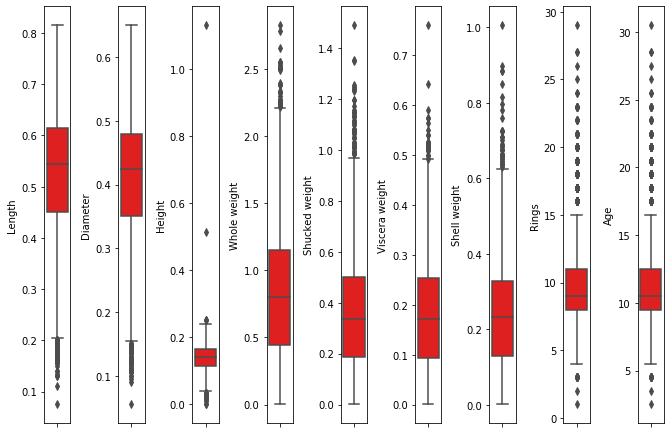

In [27]:
#column plot
collist = df.columns.values
ncols=12
nrows=10
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

In [28]:
#dividing the x values and y values
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [29]:
x= df.drop("Rings", axis=1)
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [30]:
y=df['Rings']
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [31]:
x.shape

(4177, 9)

In [32]:
y.shape

(4177,)

In [33]:
y = y.values.reshape(-1,1)

In [34]:
y

array([[15],
       [ 7],
       [ 9],
       ...,
       [ 9],
       [10],
       [12]], dtype=int64)

In [35]:
y.shape

(4177, 1)

In [36]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.33,random_state=39)

In [37]:
train_x.shape

(2798, 9)

In [38]:
train_y.shape

(2798, 1)

In [39]:
test_x.shape

(1379, 9)

In [40]:
test_y.shape

(1379, 1)

In [41]:
#using linear regression

lg=LinearRegression()
lg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lg.coef_

array([[-3.57693591e-16, -3.31630025e-15, -8.57346916e-15,
        -6.79018796e-15,  3.74050851e-15, -1.03121964e-14,
         5.68615116e-15,  2.92814064e-17,  1.00000000e+00]])

In [43]:
lg.intercept_

array([-1.5])

In [44]:
lg.score(train_x,train_y)

1.0

In [45]:
#predict the value
pred=lg.predict(test_x)
print("Predicted result :",pred)
print("actual ",test_y)

Predicted result : [[13.]
 [ 9.]
 [ 9.]
 ...
 [10.]
 [14.]
 [14.]]
actual  [[13]
 [ 9]
 [ 9]
 ...
 [10]
 [14]
 [14]]


In [46]:
print('LG-error:-')

print('Mean absolute error:',mean_absolute_error(test_y,pred))
print('Mean sqaured error:',mean_squared_error(test_y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_y,pred)))

LG-error:-
Mean absolute error: 1.2662500167733475e-15
Mean sqaured error: 2.96895438585718e-30
Root mean squared error: 1.723065403824585e-15


In [47]:
#Boost through GradientBoostRegressor By using Parameters
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_x, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_x,train_y)
print("model_Score:",model_score)

model_Score: 0.9999507144013542


In [49]:
## The mean squared error
y_predictedgbr = modelgbr.predict(test_x)
print("Mean squared error: %.2f"% mean_squared_error(test_y, y_predictedgbr))
print('R2 Score: %.2f' % r2_score(test_y, y_predictedgbr))

Mean squared error: 0.00
R2 Score: 1.00


In [ ]:
#Lets Visualize the Goodness of the Prediction
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_y, y_predictedgbr, edgecolors=(1, 1, 1))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Truth vs Predicted")
plt.show()

In [51]:
#Linear Regression using Recursion
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=55,test_size=0.20)

In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(1,42):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=r_state)
        regr.fit(train_x,train_y)
        y_pred = regr.predict(test_x)
        r2_scr=r2_score(test_y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [53]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,x,y)

r2 score corresponding to  1 is 1.0
r2 score corresponding to  2 is 1.0
r2 score corresponding to  3 is 1.0
r2 score corresponding to  4 is 1.0
r2 score corresponding to  5 is 1.0
r2 score corresponding to  6 is 1.0
r2 score corresponding to  7 is 1.0
r2 score corresponding to  8 is 1.0
r2 score corresponding to  9 is 1.0
r2 score corresponding to  10 is 1.0
r2 score corresponding to  11 is 1.0
r2 score corresponding to  12 is 1.0
r2 score corresponding to  13 is 1.0
r2 score corresponding to  14 is 1.0
r2 score corresponding to  15 is 1.0
r2 score corresponding to  16 is 1.0
r2 score corresponding to  17 is 1.0
r2 score corresponding to  18 is 1.0
r2 score corresponding to  19 is 1.0
r2 score corresponding to  20 is 1.0
r2 score corresponding to  21 is 1.0
r2 score corresponding to  22 is 1.0
r2 score corresponding to  23 is 1.0
r2 score corresponding to  24 is 1.0
r2 score corresponding to  25 is 1.0
r2 score corresponding to  26 is 1.0
r2 score corresponding to  27 is 1.0
r2 score c

In [54]:
#KNN

from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_x,train_y)
knr1.score(train_x,train_y)
predicted=knr1.predict(test_x)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_y, predicted))

Mean squared error of linear svc: 0.00
R2 Score of linear svc: 1.00


In [55]:
#Lets use grid_search to find optimal value of n_neighbors for KNN Model
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 2}

In [56]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=19)
r_state = maxr2_score(knr,x,y)

r2 score corresponding to  1 is 0.9994145547818711
r2 score corresponding to  2 is 0.9913663096472795
r2 score corresponding to  3 is 0.9988876866934051
r2 score corresponding to  4 is 0.9982483578787832
r2 score corresponding to  5 is 0.9958602811660269
r2 score corresponding to  6 is 0.9990799704228097
r2 score corresponding to  7 is 0.9948093265558953
r2 score corresponding to  8 is 0.9973890912645779
r2 score corresponding to  9 is 0.9968562121584491
r2 score corresponding to  10 is 0.9985053415060211
r2 score corresponding to  11 is 0.999430025041275
r2 score corresponding to  12 is 0.9983767827994542
r2 score corresponding to  13 is 0.998223809635571
r2 score corresponding to  14 is 0.9994661962820535
r2 score corresponding to  15 is 0.9993146124911261
r2 score corresponding to  16 is 0.9985921878986426
r2 score corresponding to  17 is 0.9985449373830695
r2 score corresponding to  18 is 0.9979177853114483
r2 score corresponding to  19 is 0.997656550045367
r2 score corresponding t

In [57]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("std deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 1.0
std deviation in r2 scorefor Linear Regression: 0.0

Mean r2 score for KNN Regression:  0.9973910467281059
std deviation in r2 score for KNN Regression: 0.0026562606713954637


In [58]:
#Boosting Linear Regression
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,x,y,cv=5,scoring="r2").mean())
print("Std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,x,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9762802479423005
Std deviation in r2 score for ada boosting Regression:  0.011154709634909579


In [59]:
#Boosting KNN model
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,x,y,cv=5,scoring="r2").mean())
print("Std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,x,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9759045460782897
Std deviation in r2 score for ada boosting Regression:  0.01211993698307568


In [60]:
#Lets check lasso regression and best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [61]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.001)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,x,y,cv=6,scoring="r2").mean())
print("std deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,x,y,cv=6,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.9999999891561816
std deviation in r2 score for Lasso Regression:  3.0051869007747397e-09


In [62]:
#Boosting Lasso Regressor
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,x,y,cv=6,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,x,y,cv=6,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9758638193640534
std deviation in r2 score for ada boosting Regression:  0.011735230167113114


In [63]:
#Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "linear")
svr1.fit(train_x,train_y)
svr1.score(train_x,train_y)
y_pred1=svr1.predict(test_x)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_y, y_pred1))


svr2 = SVR(kernel = "poly")
svr2.fit(train_x,train_y)
svr2.score(train_x,train_y)
y_pred2=svr2.predict(test_x)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_y,y_pred2))
print('R2 Score of poly svc: %.2f' % r2_score(test_y, y_pred2))


svr3 = SVR(kernel = "rbf")
svr3.fit(train_x,train_y)
svr3.score(train_x,train_y)
y_pred3=svr3.predict(test_x)
print("Mean squared error of rbf svc: %.2f"% mean_squared_error(test_y,y_pred3))
print('R2 Score of rbf svc: %.2f' % r2_score(test_y, y_pred3))

Mean squared error of linear svc: 0.00
R2 Score of linear svc: 1.00
Mean squared error of poly svc: 0.26
R2 Score of poly svc: 0.97
Mean squared error of rbf svc: 0.02
R2 Score of rbf svc: 1.00


In [64]:
svr_grs=SVR(C=1.5, epsilon=0.1, gamma=1e-07, kernel='linear')
print("Mean r2 score for ada boosting Regression: ",cross_val_score(svr_grs,x,y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(svr_grs,x,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9995804164605223
std deviation in r2 score for ada boosting Regression:  0.0003170232565787542


In [65]:
#Boosting Support Vector Machine
from sklearn.ensemble import AdaBoostRegressor
ada_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,x,y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,x,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9726173121166077
std deviation in r2 score for ada boosting Regression:  0.006123358750870427


In [66]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtr = DecisionTreeRegressor(random_state = 0)  
  
 
dtr.fit(x,y) 

dtr.score(train_x,train_y)
y_pred4=dtr.predict(test_x)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


In [67]:
#Decision Tree Regressor Using GridSearchCV
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(x,y)
print("R-Squared on train dataset={}".format(dtm.score(test_x,test_y)))

dtm.fit(test_x,test_y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_x,test_y)))

R-Squared on train dataset=0.9822499756901372
R-Squaredon test dataset=0.9836958280944109


In [68]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                      

In [69]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.9958257091716644
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 20}


In [70]:
#Boosting Decision Tree
ada_reg5=AdaBoostRegressor()
add_reg5=AdaBoostRegressor(base_estimator=dtm,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg5,x,y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg5,x,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9808427969312028
std deviation in r2 score for ada boosting Regression:  0.005951067649092255


In [71]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=5)
RFR.fit(train_x, train_y)
y_pred5 = RFR.predict(test_x)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_y, y_pred5))

Mean squared error of poly svc: 0.00
R2 Score : 1.00


In [72]:
#Random Forest Regressor with GridSearchCV
rf_gs = RandomForestRegressor(n_estimators=100)
n_features = x.shape[1]

In [73]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(x,y)
print(grid.best_params_)

{'max_features': 9, 'max_depth': 17}


In [74]:
rf_gss = RandomForestRegressor(max_features = 3, max_depth = 9)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,x,y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,x,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9670006442823323
std deviation in r2 score for ada boosting Regression:  0.014532539724789394


In [75]:
#Boosting RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=RFR,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,x,y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,x,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.9995353957319377
std deviation in r2 score for ada boosting Regression:  0.0008619963852378373


#among all the models, in (dtr,KNN)we have received the r2 score as 1 and mean square value is o so, we can save this model

In [76]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dtr,'abalone.pkl')

['abalone.pkl']